In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_data = pd.read_csv("churn.csv")

In [3]:
bank_data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Задание 9.1 #

In [6]:
exited_0 = bank_data[bank_data['Exited'] == 0]['Exited']
exited_1 = bank_data[bank_data['Exited'] == 1]['Exited']

In [7]:
# Количество клиенотв:
print(f'Количество лояльных клиентов - {len(exited_0)}')
print(f'Количество ушедших клиентов - {len(exited_1)}')
print(f'Количество оставшихся клиентов превышает количество ушедших на {round(100 - len(exited_1)/len(exited_0) * 100, 2)}%')

Количество лояльных клиентов - 7963
Количество ушедших клиентов - 2037
Количество оставшихся клиентов превышает количество ушедших на 74.42%


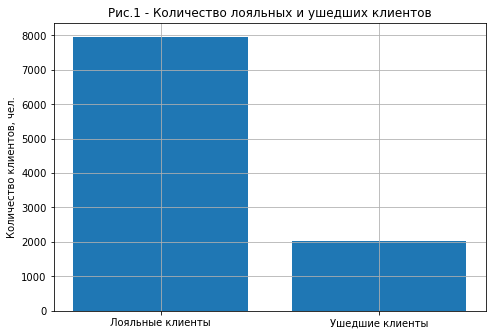

In [8]:
clients = bank_data.groupby('Exited').count()['RowNumber']

fig_1 = plt.figure()
axes_1 = fig_1.add_axes([0, 0, 1, 1])
axes_1.bar(x=['Лояльные клиенты', 'Ушедшие клиенты'], height=clients)
axes_1.set_ylabel('Количество клиентов, чел.')
axes_1.set_title('Рис.1 - Количество лояльных и ушедших клиентов')
axes_1.grid()
plt.show()

Из рисунка 1 видно, что количество лояльных клиентов значительно превышает (на 74.42%) количество ушедших.

# Задание 9.2 #

In [9]:
over_2500_balance = bank_data[bank_data['Balance'] > 2500]

Text(0.5, 0, 'Баланс на счету клиента, $')

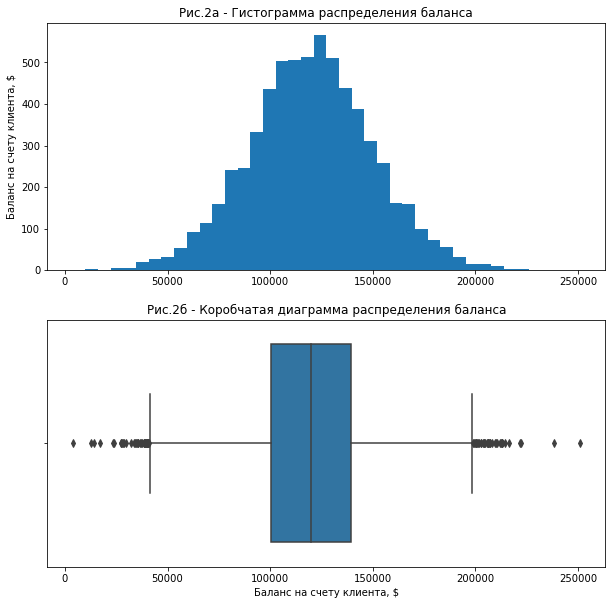

In [10]:
fig_2, axes_2 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes_2[0].hist(x=over_2500_balance['Balance'], bins=40)
axes_2[0].set_ylabel('Баланс на счету клиента, $')
axes_2[0].set_title('Рис.2а - Гистограмма распределения баланса')

boxplot=sns.boxplot(
    data=over_2500_balance,
    x='Balance')
boxplot.set_title('Рис.2б - Коробчатая диаграмма распределения баланса')
boxplot.set_xlabel('Баланс на счету клиента, $')

Описание......


# Задание 9.3 #

In [11]:
bank_data['Лояльность клиента'] = bank_data['Exited'].apply(lambda x: 'Лояльный клиент' if x == 1 else 'Ушедший клиент')

Text(0.5, 0, 'Баланс на счету клиента, $')

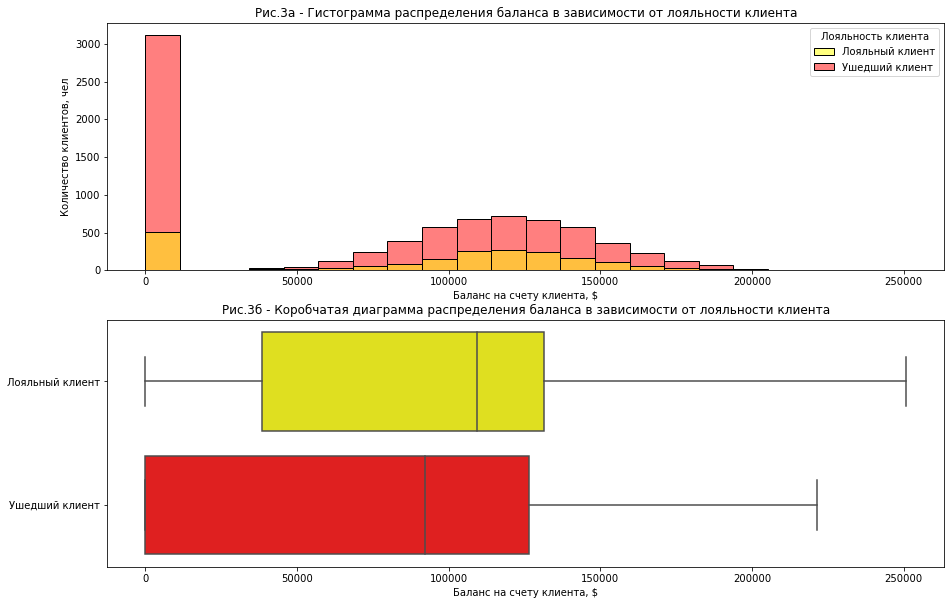

In [12]:
fig_3, axes_3 = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

histplot=sns.histplot(
    data=bank_data, 
    x="Balance", 
    hue="Лояльность клиента",
    ax=axes_3[0],
    palette=['yellow', 'red']
)
histplot.set_title('Рис.3а - Гистограмма распределения баланса в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов, чел')
histplot.set_xlabel('Баланс на счету клиента, $')

boxplot=sns.boxplot(
    data=bank_data,
    y='Лояльность клиента',
    x='Balance',
    orient='h',
    ax=axes_3[1],
    palette=['yellow', 'red']
)
boxplot.set_title('Рис.3б - Коробчатая диаграмма распределения баланса в зависимости от лояльности клиента')
boxplot.set_ylabel("")
boxplot.set_xlabel("Баланс на счету клиента, $")
